# Solving Wine Quality classification problem with deep neural 

*   Elemento de lista
*   Elemento de lista

networks and tf.Keras

## 1. Import libraries 

In [1]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


## 2. Load data

In [2]:
ATT_FILE = "/gdrive/My Drive/Proyecto_RN_DL/datasets/WineQuality/WineQualityPreparedCleanAttributes.csv"
LABEL_FILE = "/gdrive/My Drive/Proyecto_RN_DL/datasets/WineQuality/WineQualityOneHotEncodedClasses.csv"

TRAIN_RATE=0.8

attributes = pd.read_csv(ATT_FILE)
label = pd.read_csv(LABEL_FILE)

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train)/2)

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]

x_dev = attributes.values[n_train:n_train+n_dev]
t_dev = label.values[n_train:n_train+n_dev]

print ("x_train:",x_train.shape)
print ("t_train:",t_train.shape)

print ("x_dev:",x_dev.shape)
print ("t_dev:",t_dev.shape)

x_train: (3918, 11)
t_train: (3918, 3)
x_dev: (490, 11)
t_dev: (490, 3)


## 3. Initialize variables

In [3]:
INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (x_dev.shape[0]/1))

Some data is displayed to test correctness:

In [4]:
x_train[:5]

array([[-0.52727273,  0.44444444, -1.        , -0.93137255, -0.66824645,
         0.09375   ,  0.19344262, -0.36192333,  0.49019608, -0.46153846,
        -0.06451613],
       [-0.56363636, -0.77777778, -0.14666667, -0.94117647, -0.74407583,
        -0.921875  , -0.5147541 , -0.48018194, -0.09803922, -0.33333333,
        -0.03225806],
       [-0.05454545, -0.44444444, -0.30666667, -0.78431373, -0.71563981,
        -0.25      , -0.32459016, -0.52046784, -0.49019608, -0.05128205,
         0.03225806],
       [ 0.23636364, -0.83333333,  0.97333333, -0.94117647, -0.81990521,
        -0.5625    , -0.01639344, -0.49447693, -0.45098039,  0.53846154,
         0.38709677],
       [-0.52727273, -0.55555556, -0.30666667, -0.07352941, -0.71563981,
        -0.046875  , -0.03606557, -0.13710201,  0.03921569, -0.28205128,
         0.03225806]])

In [5]:
t_train[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [6]:
x_dev[:5]

array([[-0.38181818, -0.80555556, -0.28      ,  0.01960784, -0.7535545 ,
        -0.3125    , -0.33770492,  0.15789474, -0.37254902, -0.58974359,
        -0.64516129],
       [-0.16363636, -0.75      , -0.14666667, -0.92156863, -0.70616114,
        -0.484375  , -0.40327869, -0.59064327, -0.29411765,  0.12820513,
         0.29032258],
       [-0.38181818, -0.38888889,  0.30666667,  0.03921569, -0.53554502,
         0.03125   ,  0.31147541,  0.22807018, -0.23529412, -0.02564103,
        -0.5483871 ],
       [-0.45454545, -0.44444444, -0.22666667,  0.83333333, -0.60189573,
        -0.46875   ,  0.04262295,  0.55945419, -0.33333333, -0.28205128,
        -0.67741935],
       [-0.01818182, -0.36111111, -0.06666667, -0.35294118, -0.6492891 ,
        -0.328125  ,  0.06885246,  0.09031839, -0.33333333, -0.20512821,
        -0.4516129 ]])

In [7]:
t_dev[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## 4. Set hyperparameters

In [8]:
n_epochs = 1100
learning_rate = 0.5
batch_size = 2048
n_neurons_per_hlayer = [250, 75, 25]

## 5. Build the model: a 9-500-250-75-25-3 full-connected deep neural network architecture

First, the topology: sequential.

In [9]:
model = keras.Sequential(name="DeepFeedforward")

Define the deep neural network topology. The **ReLU** activation function is chosen for the hidden layers and **softmax** for the output layer. 

Adding layers to the model. First, the model takes as input arrays with *INPUTS* columns. *InputLayer* creates a placeholder where the data is ready to feed the network. Then, the hidden layers with 500, 250, 75, and 25 neurons and the *ReLU* activation function are created. Finally, the output layer with the *softmax* activation function is appended. 

In [10]:
#Without
model.add(keras.layers.InputLayer(input_shape=(INPUTS,), batch_size=None))

my_initializer=  keras.initializers.he_uniform(seed=None)
'''my_regularizer=  keras.layers.Dropout(rate=0.01)'''

for neurons in n_neurons_per_hlayer:
  '''model.add(keras.layers.Dense(neurons, activation="relu", kernel_initializer=my_initializer, kernel_regularizer=my_regularizer))'''
  model.add(keras.layers.Dense(neurons, activation="relu", kernel_initializer=my_initializer))
  '''model.add(keras.layers.Dense(neurons, activation="relu"))'''
  model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

#After
'''model.add(keras.layers.InputLayer(input_shape=(INPUTS,), batch_size=None))

my_initializer= keras.initializers.he_uniform(seed=None)
for neurons in n_neurons_per_hlayer:
  model.add(keras.layers.Dense(neurons, activation="relu", kernel_initializer=my_initializer))
  model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))
'''

#Before
'''model.add(keras.layers.InputLayer(input_shape=(INPUTS,), batch_size=None))

my_initializer= keras.initializers.he_uniform(seed=None)
for neurons in n_neurons_per_hlayer:
  model.add(keras.layers.Dense(neurons, kernel_initializer=my_initializer))
  model.add(keras.layers.Dense(neurons))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation("relu"))

model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))
'''

model.summary()



Model: "DeepFeedforward"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               3000      
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 75)                18825     
_________________________________________________________________
dropout_1 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1900      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)             

For example, the last layer's kernel comprises 78 parameters to adjust: 25 neurons in the previous layer by 3 neurons in the output layer plus the 3 biases, one for each output neuron. 

In [11]:
model.layers

In [12]:
for l in model.layers: print (l.name)

dense
dropout
dense_1
dropout_1
dense_2
dropout_2
dense_3


All the parameters of a layer can bee accessed:

In [13]:
weights, biases = model.layers[0].get_weights()
weights.shape

(11, 250)

In [14]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
biases.shape

(250,)

## 6. Compile the model

Compiling the model means specifying the *loss* function (the $log-loss$,  $cross-entropy$, the sum of log-loss is a loss) and the *optimizer* (Gradient Descent) to use. Optionally, you can also set a list of additional *metrics* (Accuracy) to compute during training and evaluation. 

In [16]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=learning_rate),
              metrics=["categorical_accuracy"])


There are several loss functions, optimizers, and metrics. Full lists are available at: https://keras.io/losses/, https://keras.io/optimizers/ and https://keras.io/metrics/.


## 7. Train the model with M-BGD

Note that an **epoch** is an iteration over the entire training dataset.

In [17]:
import time
start = time.clock()
history = model.fit(x_train, t_train, batch_size=batch_size, epochs=n_epochs, verbose=0, validation_data=(x_dev, t_dev))    
print (time.clock() - start)

22.996536


## 8. Get the results

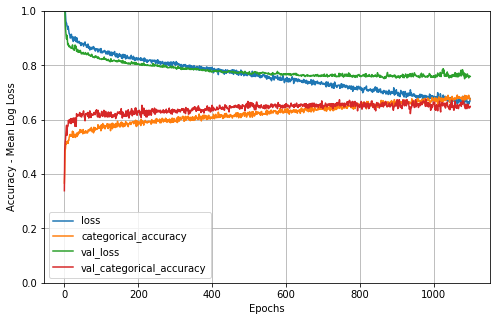

In [18]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [19]:
history.params

{'epochs': 1100, 'steps': 2, 'verbose': 0}

In [20]:
results[-1:]

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
1099,0.677695,0.674068,0.759288,0.64898


In [21]:
print ("Accuracy for the training set: ", results.categorical_accuracy.values[-1:][0])

Accuracy for the training set:  0.6740683913230896


In [22]:
print ("Accuracy for the development test set: ", results.val_categorical_accuracy.values[-1:][0])

Accuracy for the development test set:  0.6489796042442322


Now the accuracy is 83% on training and 77% on the development test set 

Let's see how the model predicts using the development test set:

In [23]:
dev_predictions=model.predict(x_dev).round(2)
dev_predictions[:20]

array([[0.09, 0.91, 0.  ],
       [0.04, 0.57, 0.4 ],
       [0.78, 0.22, 0.  ],
       [0.72, 0.28, 0.  ],
       [0.66, 0.34, 0.  ],
       [0.69, 0.31, 0.  ],
       [0.32, 0.45, 0.23],
       [0.25, 0.72, 0.03],
       [0.22, 0.77, 0.01],
       [0.04, 0.56, 0.4 ],
       [0.84, 0.16, 0.  ],
       [0.06, 0.38, 0.56],
       [0.01, 0.4 , 0.59],
       [0.  , 0.34, 0.66],
       [0.71, 0.29, 0.  ],
       [0.44, 0.56, 0.  ],
       [0.26, 0.74, 0.  ],
       [0.27, 0.55, 0.18],
       [0.73, 0.27, 0.  ],
       [0.7 , 0.3 , 0.  ]], dtype=float32)

In [24]:
dev_rounded_predictions=np.round(dev_predictions)
indices = np.argmax(dev_predictions,1)
for row, index in zip(dev_rounded_predictions, indices): row[index]=1
dev_rounded_predictions[:20]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [25]:
t_dev[:20] #target classes

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [26]:
dev_correct_predictions = np.equal(np.argmax(dev_rounded_predictions,1),np.argmax(t_dev,1))
print (dev_correct_predictions[:30])

[ True False False  True  True False  True False  True False  True  True
  True  True  True False False False  True False False  True  True  True
 False  True False False  True  True]


In [27]:
from collections import Counter
Counter (dev_correct_predictions)

Counter({False: 173, True: 317})

## 8. Final Test

### 8.1 Load the final test set

In [28]:
n_final_test = n_instances-n_train-n_dev

x_final_test = attributes.values[n_train+n_dev:n_instances]
t_final_test = label.values[n_train+n_dev:n_instances]

print ("x_test:",x_final_test.shape)
print ("t_test:",t_final_test.shape)

x_test: (490, 11)
t_test: (490, 3)


### 8.2 Evaluate the model

In [29]:
model.evaluate(x_final_test, t_final_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.7904 - categorical_accuracy: 0.6347


[0.7904218435287476, 0.6346938610076904]

77% accuracy on the final test set

The outputs computed by the neural network for the final testing dataset. 

In [30]:
test_predictions=model.predict(x_final_test)
test_rounded_predictions=np.round(test_predictions)
indices = np.argmax(test_predictions,1)
for row, index in zip(test_rounded_predictions, indices): row[index]=1
test_rounded_predictions[:20]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

The target outputs.

In [31]:
t_final_test[:20]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

The first 30 predictions. True means that the neural network correctly classifies the input vector.  

In [32]:
test_correct_predictions = np.equal(np.argmax(test_rounded_predictions,1),np.argmax(t_final_test,1))
test_correct_predictions[:30]

array([False, False,  True, False, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False])

**The final test accuracy.**

In [33]:
from collections import Counter
final_test_prediction_results=Counter(test_correct_predictions)
final_test_prediction_results

Counter({False: 179, True: 311})

In [34]:
final_test_prediction_results[True]/sum(final_test_prediction_results.values())

0.6346938775510204